In [1]:
import matplotlib.pyplot as plt
from kmeans import k_mean,find_k_features
import numpy as np
import cv2

def bgr2rgb(img_bgr):
    img_rgb = np.zeros(img_bgr.shape, img_bgr.dtype)
    img_rgb[:,:,0] = img_bgr[:,:,2]
    img_rgb[:,:,1] = img_bgr[:,:,1]
    img_rgb[:,:,2] = img_bgr[:,:,0]
    return img_rgb


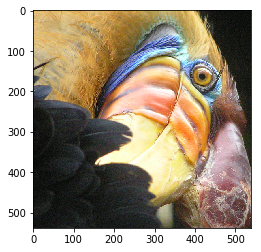

In [2]:
im1 = bgr2rgb(cv2.imread('bird_large.tiff'))
plt.imshow(im1)
plt.show()

In [3]:
k = 5
# k colors                
# low k make difference when we apply k-mean ++

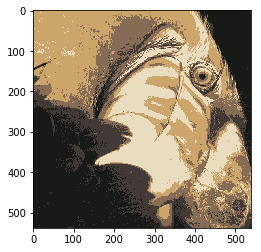

In [4]:
########        K_MEANS_PLUSPLUS      #########
photo = cv2.imread("bird_large.tiff")
origin_shape = photo.shape
photo = photo.reshape(-1,3) * 1.0
photo_k_mean_plus = k_mean(photo,k,plus=True)

###########################################################
#   in k_mean. i apply Vectorize(aspired by CS231n assignment 1)
#   , makes this faster! =)
###########################################################

photo_ok = photo_k_mean_plus.reshape(origin_shape)
k_photo = cv2.imwrite('after_k_plus.tiff',photo_ok)
im = bgr2rgb(cv2.imread('after_k_plus.tiff'))
plt.imshow(im)
plt.show()

#############################################################
#   I am generating K feature colors using K-mean++
#   To get longest distance feature.
#   You can check utils.py 
############################################################

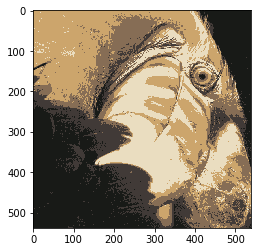

In [5]:
########        K_MEAN_CLASSIC      #########
photo = cv2.imread("bird_large.tiff")
origin_shape = photo.shape
photo = photo.reshape(-1,3) * 1.0
photo_k_mean = k_mean(photo,k,plus=False)
###########################################################
#   in k_mean. i apply Vectorize(aspired by CS231n assignment 1)
#   , makes this faster! =)
##########################################################

photo_ok2 = photo_k_mean.reshape(origin_shape)
k_photo = cv2.imwrite('after_k_classic.tiff',photo_ok2)
im = bgr2rgb(cv2.imread('after_k_classic.tiff'))
plt.imshow(im)
plt.show()
#############################################################
#   As shown, low k with random choices is not good, but 
#   k-mean++ is good to handle this situation---> it has 
#   blue around eyes.
############################################################